# Variational Circuit Map Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator, random_unitary
from scipy.linalg import sqrtm, expm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from utils import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
def spectrum_pipeline(spam_model, kraus_model, data, num_iter_spam, num_iter_map):
    d = spam_model.d
    kraus_model.spam = spam_model
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam_model.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                        num_iter = 300,
                        verbose = False,
                       )
    
    spam_model.train(inputs = inputs_spam,
                     targets = targets_spam,
                     num_iter = num_iter_spam,
                     verbose = False,
                    )
    
    model = ModelQuantumMap(
                            q_map = kraus_model,
                            loss = ProbabilityLoss(0.001),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                verbose = False,
                )
    
    choi = maps_to_choi([kraus_model])
    spectrum = choi_spectrum(choi)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

### Three Layers

In [4]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_3.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0013294516762903154


  0%|          | 0/1000 [00:00<?, ?it/s]

0.004683617441221471 0


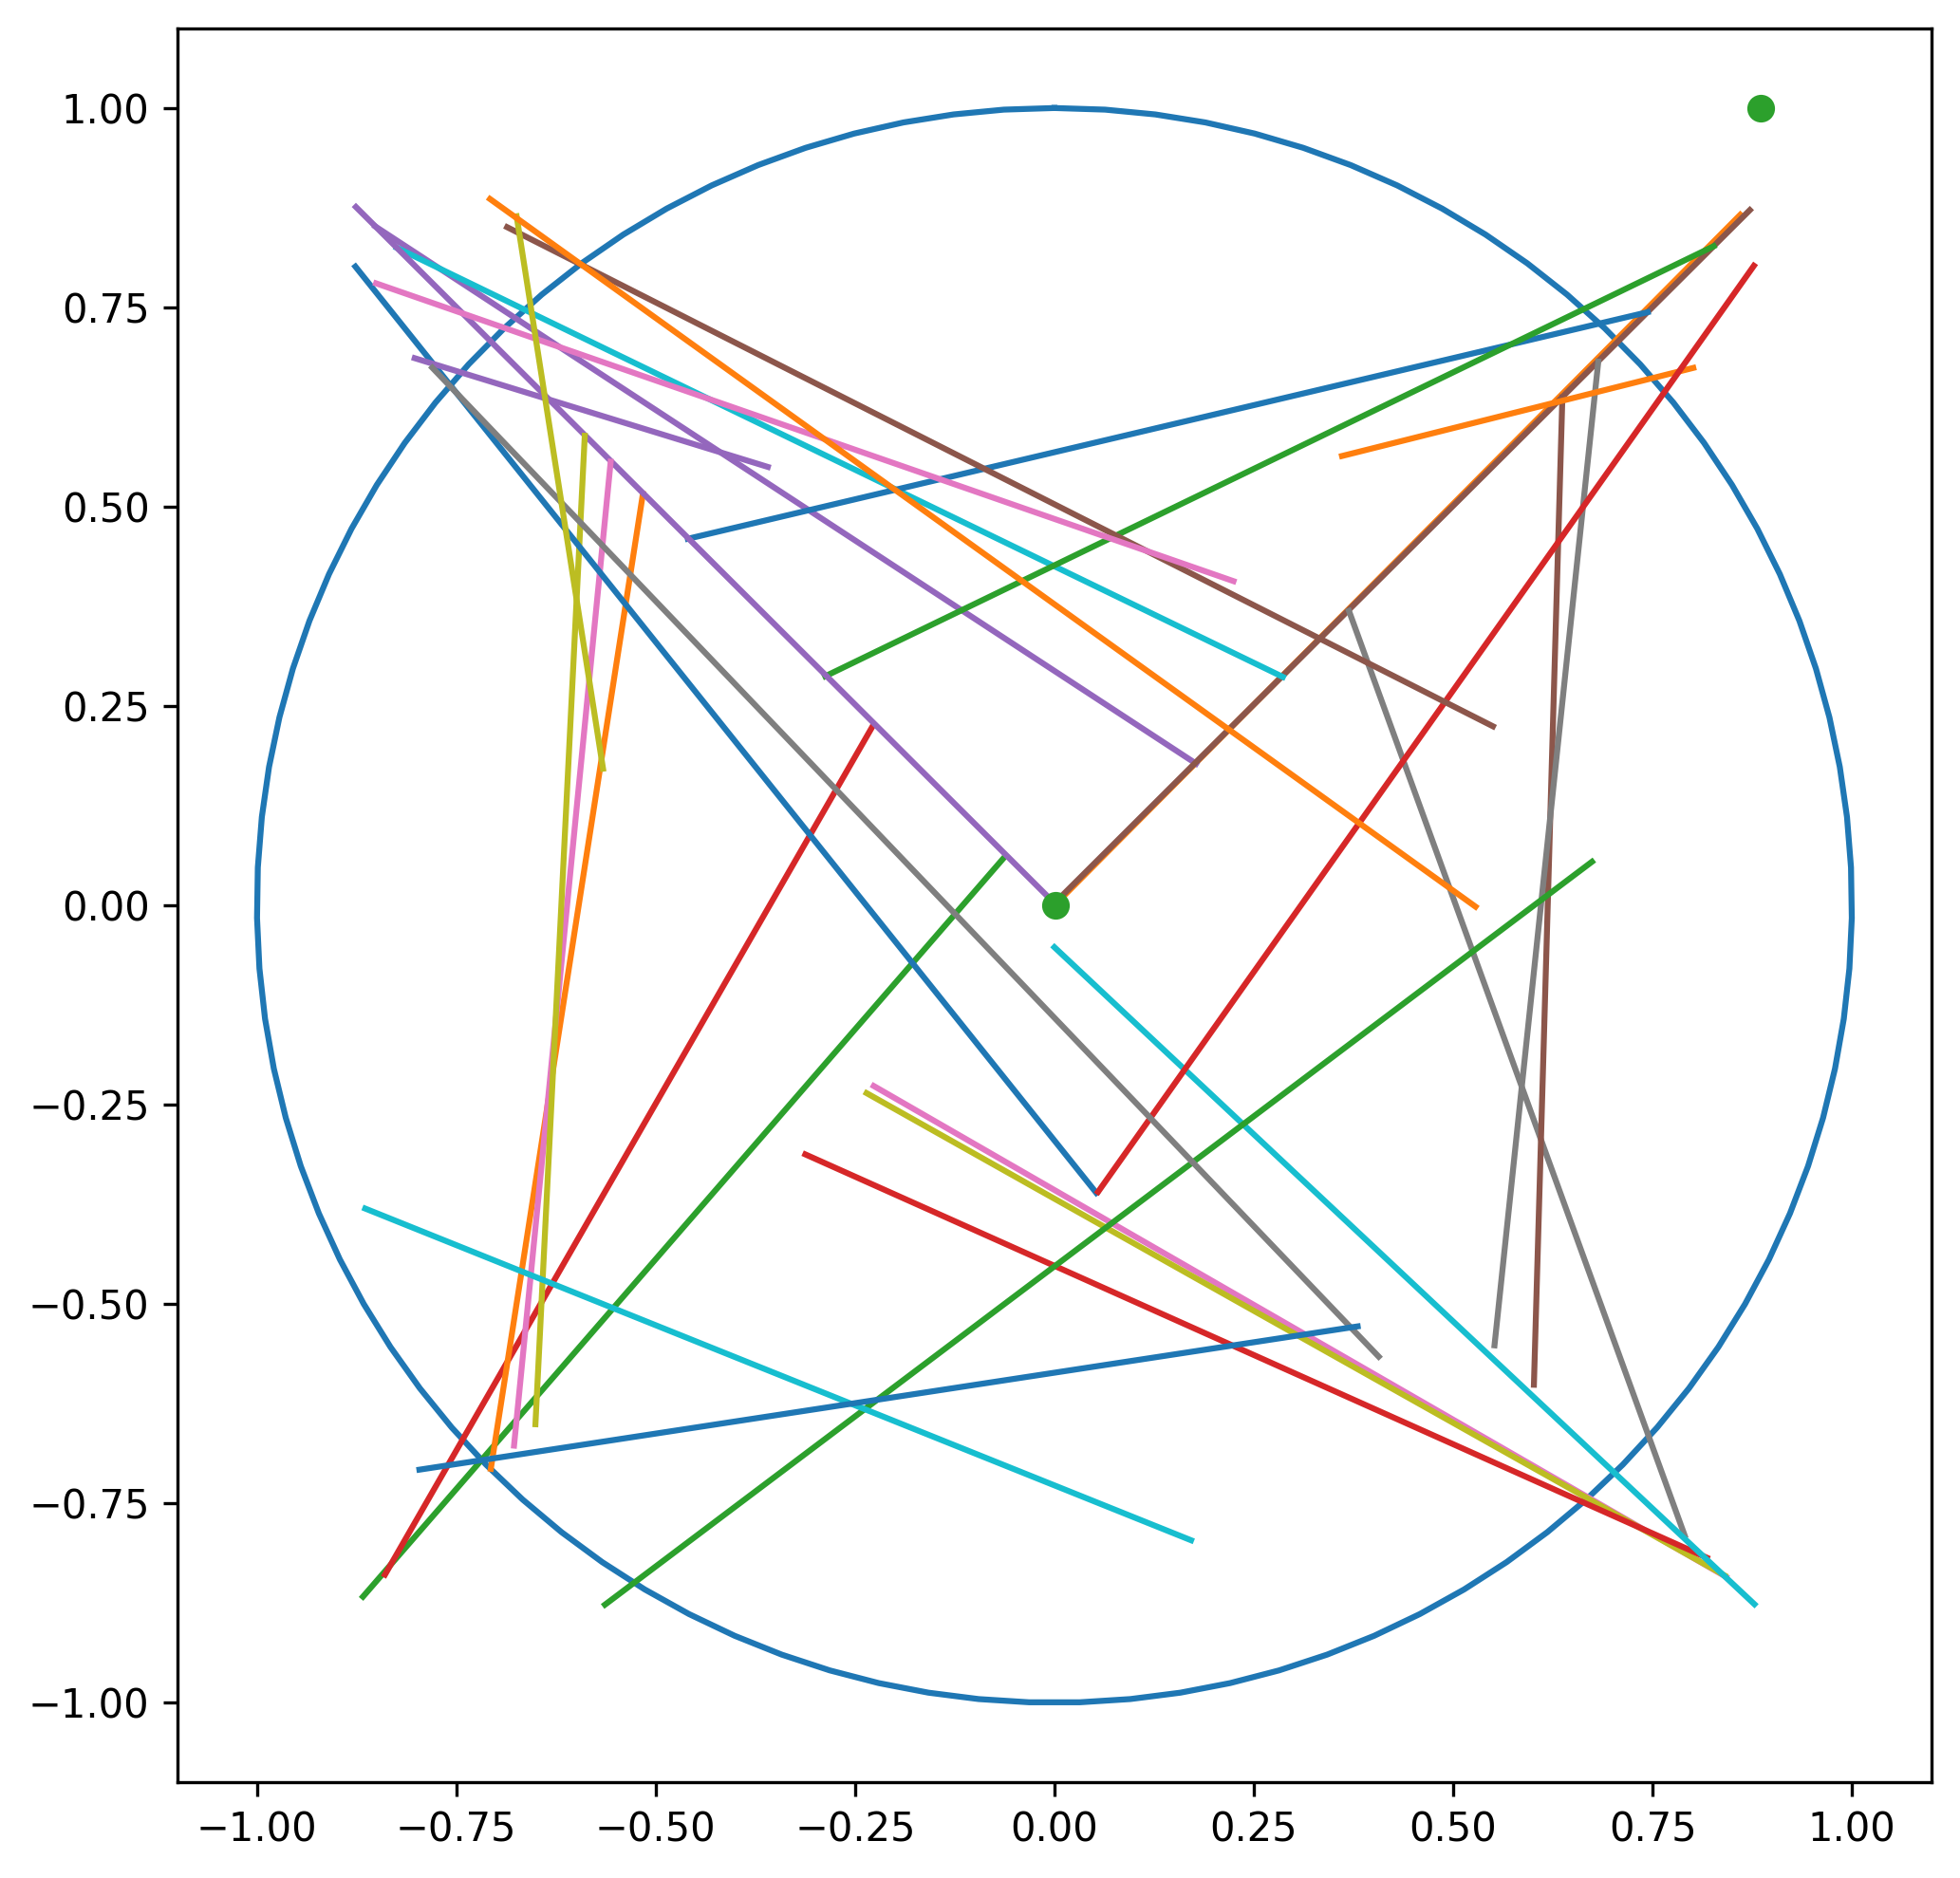

In [7]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum, "o")
plt.show()

In [6]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_6.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004414185189940032


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_12.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()

## 9 Layer vs. Toy Model

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum1, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                             use_corr_mat=True,
                                             optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                             kraus_model = KrausMap(d = d, 
                                                                    rank = d**2), 
                                             data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                             num_iter_spam = 1000, 
                                             num_iter_map = 1000,
                                             )

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_2.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum2, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_3.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum3, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_4.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum4, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_7.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum5, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            )

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
plt.plot(spectrum2[:,0], spectrum2[:,1], "o")
plt.plot(spectrum3[:,0], spectrum3[:,1], "o")
plt.plot(spectrum4[:,0], spectrum4[:,1], "o")
plt.plot(spectrum5[:,0], spectrum5[:,1], "o")
plt.legend(["_", "First Realization", "Second Realization", "Third Realization", "Fourth Realization"])
plt.show()

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = random_unitary(8, seed=42)
c = 0.65
rank = 8

kraus_target = KrausMap(U = U,
                        c = c,
                        d = d, 
                        rank = rank-1)

choi_target = maps_to_choi([kraus_target])
spectrum_target = choi_spectrum(choi_target)

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")
plt.legend(["_", "L=9 Random VQC", "U=Haar, C=0.65, Rank=8"])
plt.show()

In [26]:
np.savetxt("ibm_vqc_spectrum.dat", np.abs(spectrum1.numpy()))
np.savetxt("model_spectrum.dat", np.abs(spectrum_target.numpy()))

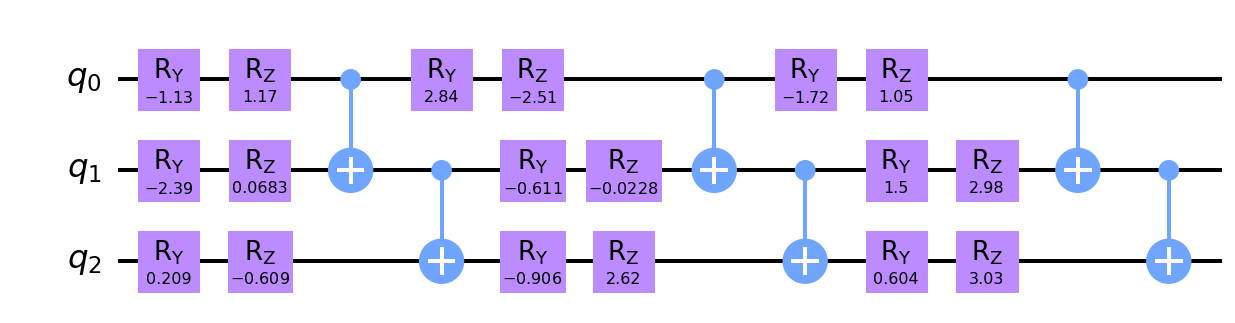

In [7]:
circuit = variational_circuit(3, 3, 0, 3)
circuit.draw(output='mpl', scale=2)